In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [3]:
df = pd.read_csv('C:\\Users\\19713\\Desktop\\Data Science Projects\\rainfall.csv')
df

,date,rainfall
0,01-01-2010,2.9
1,02-01-2010,10.2
2,03-01-2010,0.9
3,04-01-2010,48.6
4,05-01-2010,9.6
...,...,...
3769,27-04-2020,0.0
3770,28-04-2020,8.4
3771,29-04-2020,5.4
3772,30-04-2020,3.2


<AxesSubplot:xlabel='date'>

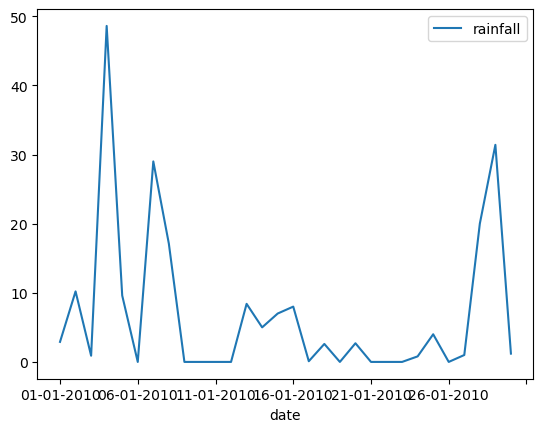

In [5]:
# First 30 days
first_30 = df[:30]

first_30.plot.line(x = 'date', y = 'rainfall')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

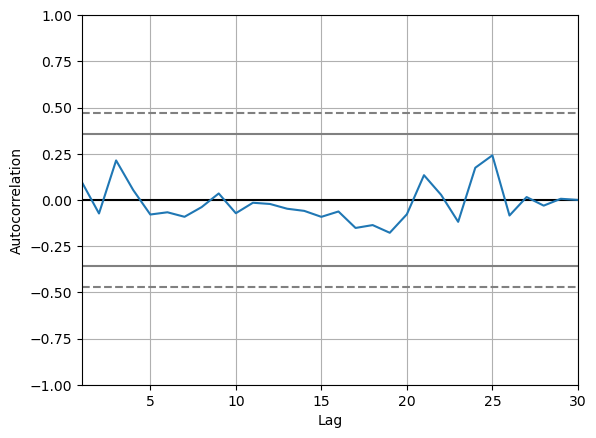

In [9]:
autocorrelation_plot(first_30['rainfall'])

There seems to be slight correlation when the lag time is short (0–5 days) and when it is sufficiently long (20–25 days), but not in between the intermediate values.

In [19]:
import statsmodels.api as sm

In [20]:
# fit model
p,d,q = 5,1,0
model = sm.tsa.ARIMA(first_30['rainfall'], order=(p,d,q))
model_fit = model.fit()

In [21]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               rainfall   No. Observations:                   30
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -112.888
Date:                Thu, 31 Aug 2023   AIC                            237.775
Time:                        12:31:56   BIC                            245.979
Sample:                             0   HQIC                           240.345
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7376      0.196     -3.766      0.000      -1.122      -0.354
ar.L2         -0.7374      0.429     -1.720      0.085      -1.578       0.103
ar.L3         -0.2237      0.677     -0.330      0.7

Notice the AIC, BIC, and HQIC metrics at the top? The lower these values are, the better the fit of the model is. So you can perform further hyperparameter tuning or data preprocessing to achieve better results!

In [24]:
data = df[:365]['rainfall'].values
# split data into train(66%) and test set (34%)
train_size = int(len(data) * 0.66)
train, test = data[0:train_size], data[train_size:len(data)]

In [25]:
# initialize the historical and prediction values for comparison purposes
history = [x for x in train]
predictions = list()

In [27]:
# train the model and make future forecast as stored in the test data
for t in range(len(test)):
    model = sm.tsa.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    pred = model_fit.forecast()
    yhat = pred[0]
    predictions.append(yhat)
    # Append test observation into overall record
    obs = test[t]
    history.append(obs)

In [29]:
# evaluate our performace
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.629


Pretty huge RMSE! Definitely there’s room for improvement here.